# Model Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import mean
from sklearn.linear_model import LinearRegression

## Compound Interest

In [2]:
def compound_interest(principal, rate, time, times_compounded):
    return principal * (1 + rate/times_compounded) ** (time * times_compounded)

In [3]:
years = np.linspace(0, 40, 401)
amount = compound_interest(500., 0.07, years, 12)

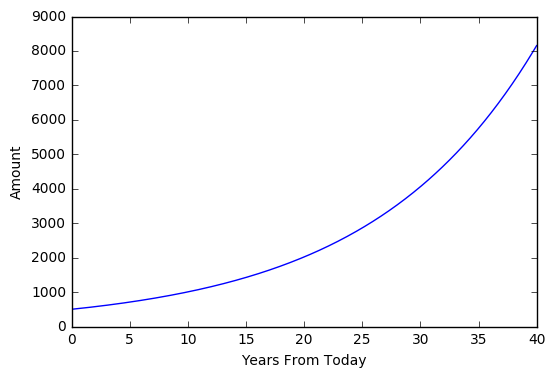

In [4]:
plt.plot(years, amount)
plt.xlabel("Years From Today")
plt.ylabel("Amount")
plt.show()

In [5]:
sample_data = amount + ((np.random.random(len(amount)) - 0.5) * 2000)

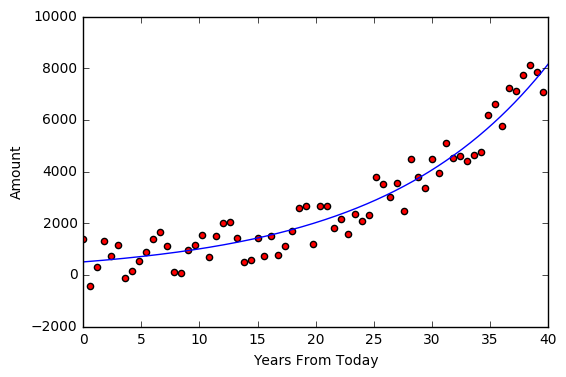

In [6]:
plt.plot(years, amount)
plt.scatter(years[::6], sample_data[::6], edgecolor=None, c='red')
plt.xlim(0,40)
plt.xlabel("Years From Today")
plt.ylabel("Amount")
plt.show()

## Linear Models

In [7]:
goog = pd.read_csv("data/goog_1yr.csv")
type(goog)

pandas.core.frame.DataFrame

In [8]:
def best_fit_slope_and_intercept(xs, ys):
    m = ((((mean(xs) * mean(ys))) - mean(xs * ys)) /
         ((mean(xs) * mean(xs)) - mean(xs * xs)))

    b = mean(ys) - m * mean(xs)

    return m, b

In [9]:
m, b = best_fit_slope_and_intercept(goog['Years Since 2009'], goog.Close)
# m = m / len(goog.Close)
# b = goog.Close.min()

print("m = {}, b = {}".format(m, b))

def line(m, b, data):
    output = m * data + b
    return output

fit = line(m, b, goog['Years Since 2009'])
# fit.describe()

m = 302.04648831689974, b = 288.04191616754207


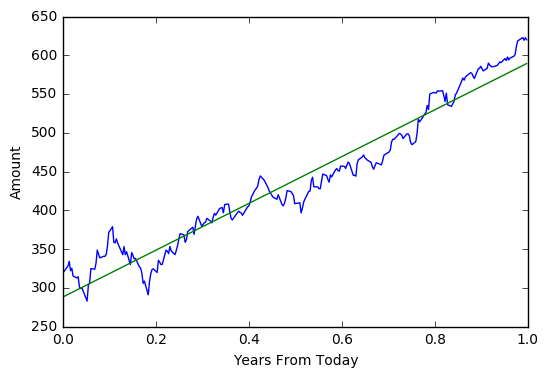

In [10]:
plt.plot(goog['Years Since 2009'], goog.Close)
plt.plot(goog['Years Since 2009'], fit)
# plt.scatter(years[::6], sample_data[::6], edgecolor=None, c='red')
plt.xlim(0,1)
plt.xlabel("Years From Today")
plt.ylabel("Amount")
plt.show()
# goog.Close.describe()

In [11]:
def step_gradient(old_b, old_m, data_x, data_y, learning_rate):
    N = len(data_x)
    
    b_grad = -(2/N) * (data_y - (old_m * data_x + old_b)).sum()
    m_grad = -(2/N) * (data_x * (data_y - (old_m * data_x + old_b))).sum()

    new_b = old_b - (learning_rate * b_grad)
    new_m = old_m - (learning_rate * m_grad)

    return new_b, new_m

In [12]:
def find_m_b(xs, ys):
    b = 200
    m = 200
    for i in range(10000):
        b, m = step_gradient(b, m, xs, ys, 0.001)
    return m, b    

m, b = find_m_b(goog['Years Since 2009'], goog.Close)
fit_step_grad = line(m, b , goog['Years Since 2009'])

In [13]:
m

290.40025141994585

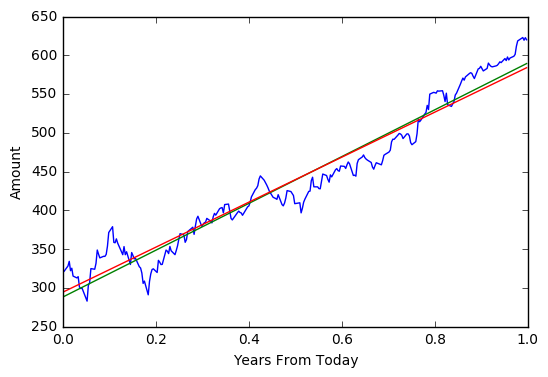

In [14]:
plt.plot(goog['Years Since 2009'], goog.Close)
plt.plot(goog['Years Since 2009'], fit)
plt.plot(goog['Years Since 2009'], fit_step_grad)
# plt.scatter(years[::6], sample_data[::6], edgecolor=None, c='red')
# plt.ylim(0, 1000)
plt.xlim(0,1)
plt.xlabel("Years From Today")
plt.ylabel("Amount")
plt.show()

In [15]:
def squared_error(ys_orig, ys_line):
   """Return standard error."""
   return sum((ys_line - ys_orig) ** 2)

def coefficient_of_determination(ys_orig, ys_line):
    """Return r squared (correlation coefficient)."""
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    sq_error_regr = squared_error(ys_orig, ys_line)
    sq_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (sq_error_regr / sq_error_y_mean)

fit_cod = coefficient_of_determination(goog.Close, fit)
fit_step_grad_cod = coefficient_of_determination(goog.Close, fit_step_grad)
print("Coefficient of Determiniation: \nfit: {}\nfit_step_grad: {}".format(fit_cod, fit_step_grad_cod))

Coefficient of Determiniation: 
fit: 0.9458364488787255
fit_step_grad: 0.9444096030067453


## Putting Gradient Descent to Use
### Kickstarter data

In [16]:
kick = pd.read_csv("data/most_backed.csv")
kick.dropna(inplace=True)
kick.columns


Index(['Unnamed: 0', 'amt.pledged', 'blurb', 'by', 'category', 'currency',
       'goal', 'location', 'num.backers', 'num.backers.tier', 'pledge.tier',
       'title', 'url'],
      dtype='object')

In [17]:
x = "num.backers"
y = "amt.pledged"
kick[y].astype(int, inplace=True)
kick[y].describe()

count    4.000000e+03
mean     2.899923e+05
std      7.119369e+05
min      1.925000e+03
25%      6.771300e+04
50%      1.205860e+05
75%      2.593680e+05
max      2.033899e+07
Name: amt.pledged, dtype: float64

In [18]:
def find_m_b(xs, ys):
    b = 100
    m = 2
    for i in range(5):
        b, m = step_gradient(b, m, xs, ys, 0.00000001)
    return m, b    

m, b = find_m_b(kick[x], kick[y])
fit_step_grad = line(m, b , kick[x])

m, b = best_fit_slope_and_intercept(kick[x], kick[y])
fit = line(m, b , kick[x])

In [19]:
print(m, b)

69.8557207416 39769.1275537


### Linear Regression for Kickstarter Data

In [20]:
# Reshape the Data
kick_backers = kick[x].reshape((len(kick), 1))

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [21]:
regress = LinearRegression()
regress.fit(kick_backers, kick[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
regress.coef_

array([ 69.85916512])

In [23]:
regress.intercept_

39695.610622122418

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


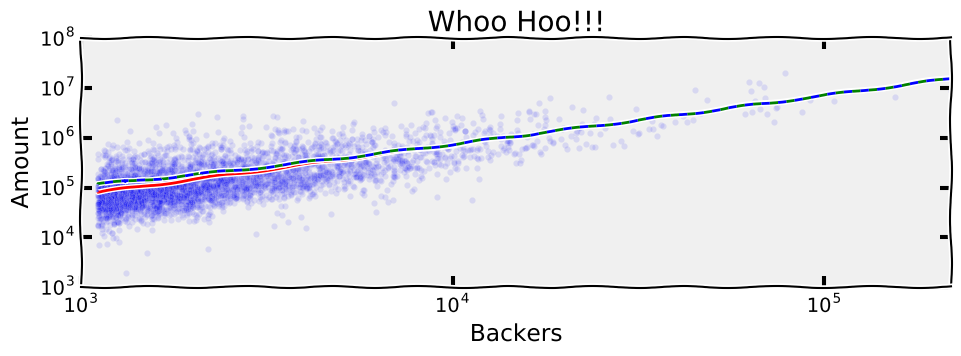

In [24]:
from matplotlib import style
style.use('fivethirtyeight')

plt.xkcd()  # Yes...

plt.figure(figsize=(10, 3))
plt.scatter(kick[x], kick[y], alpha=0.1)
plt.plot(kick[x], fit_step_grad, color='red')
plt.plot(kick[x], fit, color='green')

plt.plot(kick[x],
         kick[x] * regress.coef_ + regress.intercept_,
         linestyle='--')


plt.xlim(1000,kick[x].max())
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Amount")
plt.xlabel("Backers")
plt.title('Whoo Hoo!!!')
plt.show()

In [25]:
fit_cod = coefficient_of_determination(kick[y], fit)
fit_step_grad_cod = coefficient_of_determination(kick[y], fit_step_grad)
print("Coefficient of Determiniation: \nfit: {}\nfit_step_grad: {}".format(fit_cod, fit_step_grad_cod))

Coefficient of Determiniation: 
fit: 0.5153749987100026
fit_step_grad: 0.5128706672474452


### Kickstarter Goal vs. Backers

In [26]:
x = "num.backers"
y = "goal"
kick[y].astype(int, inplace=True)
kick[y].describe()

kick_backers = kick[x].reshape((len(kick), 1))

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [27]:
# kick.goal.describe()
regress = LinearRegression()
regress.fit(kick_backers, kick[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


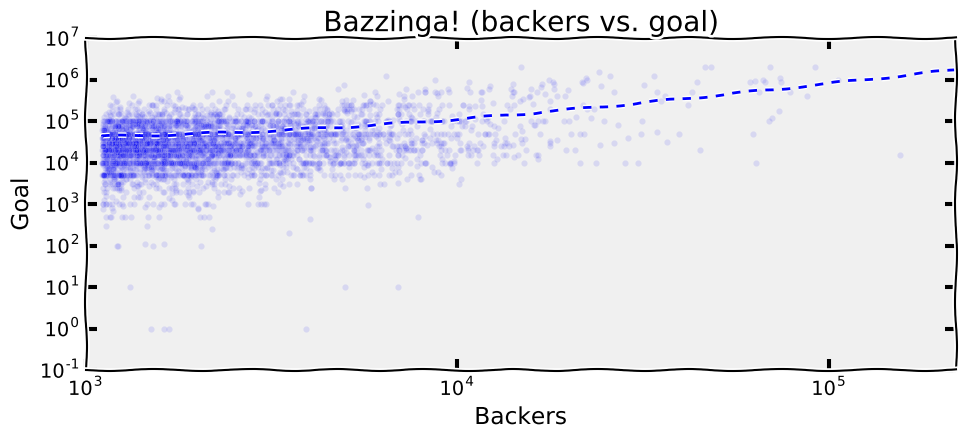

In [28]:
plt.figure(figsize=(10, 4))
plt.scatter(kick[x], kick[y], alpha=0.1)
# plt.plot(kick[x], fit_step_grad, color='red')
# plt.plot(kick[x], fit, color='green')

plt.plot(kick[x],
         kick[x] * regress.coef_ + regress.intercept_,
         linestyle='--')
# plt.scatter(kick[x],
#             regress2.predict(kick[[]])
#             kick[x] * regress.coef_ + regress.intercept_,
#             linestyle='--')

plt.xlim(1000,kick[x].max())
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Backers")
plt.ylabel("Goal")
plt.title("Bazzinga! (backers vs. goal)")
plt.show()

## Scikit-Learn Linear Regression

In [29]:
goog_dates = goog["Years Since 2009"].reshape((len(goog), 1))

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [30]:
regress = LinearRegression()
regress.fit(goog_dates, goog["Daily Avg"])

regress2 = LinearRegression()
regress2.fit(goog[["Years Since 2009", "Volume"]], goog["Daily Avg"])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
regress.coef_

array([ 302.01534383])

In [32]:
regress.intercept_

287.59810765950419

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


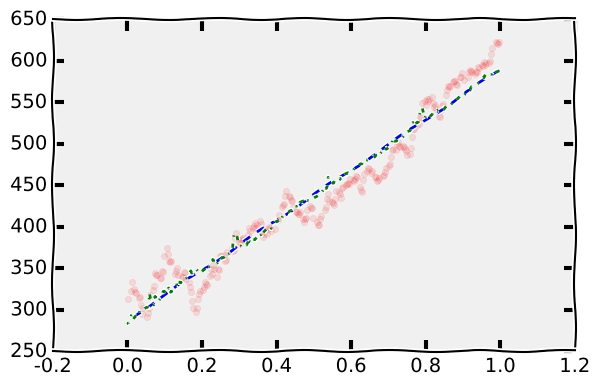

In [33]:
plt.scatter(goog["Years Since 2009"], goog["Daily Avg"], color="red", alpha=0.1)
plt.plot(goog["Years Since 2009"],
         goog["Years Since 2009"] * regress.coef_ + regress.intercept_,
         linestyle='--')
plt.plot(goog["Years Since 2009"],
         goog["Years Since 2009"] * regress2.coef_[0] + goog["Volume"] * regress2.coef_[1] + regress2.intercept_,
         color="green",
         linestyle="-."
        )
plt.show()

In [34]:
regress.predict([2.0])

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 891.62879532])

In [35]:

chi_sq = sum((goog["Daily Avg"] - regress.predict(goog["Years Since 2009"].reshape(-1, 1)))**2/(goog["Daily Range"]**2))

def chisq_dof(data, model):
    (Data - Model)^2 / Model

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [41]:
from scipy.stats import chisquare

def chisq_dof(f_obs, f_exp, ddof):
    chi = chisquare(f_obs, f_exp, ddof)
    print(chi[0])
    return chi[0] 
    
regress_chi = chisq_dof(regress.predict(goog["Years Since 2009"].values.reshape(-1, 1)),
          goog["Daily Avg"],
          1
         )
regress_chi2 = chisq_dof(regress2.predict(goog[["Years Since 2009", "Volume"]]),
                        goog["Daily Avg"],
                        2
                       ) 
chi_sq_dof = regress_chi / (len(goog) - 2)
print("Chi Sqaure Degrees of Fredom: {}".format(chi_sq_dof))

253.991355784
249.299788493
Chi Sqaure Degrees of Fredom: 1.0159654231350754
